#Image classification

Creating an image classifier for the Cifar10 dataset using tensorflow and keras.

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import sys
sys.path.insert(0,"/content/gdrive/MyDrive/data_science_projects/data_science_projects_2022/cifar10_image_classification/modules/")

In [ ]:
from import_data import get_data, get_train_test_data, normalise_data
from create_pipeline import create_pipeline

In [3]:
%load_ext autoreload
%autoreload 2

from import_data import get_data, get_train_test_data, normalise_data
from create_pipeline import create_pipeline
from image_classification_model import create_model, compile_model, compile_model2, train_model

from tensorflow.keras.layers import Conv2D, Dense, Input, Flatten
from tensorflow import keras


In [12]:
def main ():
    from tensorflow.keras.datasets import cifar10
    raw_data = get_data (cifar10)

    Xy_data = get_train_test_data (raw_data)

    Xy_data_normalised = normalise_data (Xy_data)

    return Xy_data_normalised

In [4]:
def main2 ():
    '''Function for running the model from importing the data to training and 
    evalution.'''
    from tensorflow.keras.datasets import cifar10
    data_model = create_pipeline ([
                                   get_data, 
                                   get_train_test_data, 
                                   normalise_data, 
                                   create_model (
                                       input_layer = Input (shape = (32, 32, 3)), 
                                       hidden_layers = [Flatten (),
                                                        Dense (64, activation = "relu"), 
                                                        Dense (64, activation = "relu"), 
                                                        Dense (10)
                                                        ]
                                                 ),
                                   compile_model2 (optimizer = "Adam",
                                                  loss = "sparse_categorical_crossentropy",
                                                  metrics = ["accuracy", "sparse_categorical_accuracy"])#,
                                   #train_model (batch_size = 32, epoch = 5)
                                   ])   #   This is a function
                                   #   Not sure if this is the best way to do 
                                   #   this. Maybe it would be better to create 
                                   #   the model and then add the returned 
                                   #   function to the pipeline.

                        #   The 'Flatten' layer is need. It reshapes the data so
                        #   the following layers output shape is one dimension. 
                        #   This is needed so the model will output the label
                        #   for each photo in the dataset. The output shape for
                        #   the end of the model is (None, 10), 10 being the 10
                        #   labels in the dataset. Without the 'Flatten' layer
                        #   the output shape of the model is (None, 32, 32, 10).
                        #   This results in a error due to the output having a 
                        #   different shape to the labels in 'y.' So, the 
                        #   'Flatten' causes the model to output a digit, which
                        #   corresponds to the label.

    data_n_model = data_model (cifar10)   #   initializing function


    return data_n_model

#### Before compile

In [5]:
test_data = main2 ()

170508288/170498071 [==============================] - 4s 0us/step
Model compiled for compile_model2


In [6]:
test_data.model.summary ()

Model: "cifar10_first_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 dense (Dense)               (None, 64)                196672    
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 10)                650       
                                                                 
Total params: 201,482
Trainable params: 201,482
Non-trainable params: 0
_________________________________________________________________


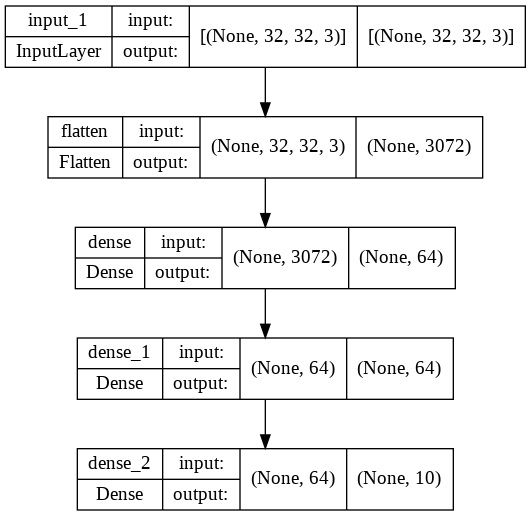

In [7]:
keras.utils.plot_model (test_data.model, show_shapes = True)

In [9]:
display (test_data._fields,
         test_data.data_raw._fields,
         test_data.data_normalised._fields)

('data_raw', 'data_normalised', 'model')

('X_train', 'y_train', 'X_test', 'y_test')

('X_train_norm', 'y_train', 'X_test_norm', 'y_test')

#### After compile

In [10]:
test_data_model = main2 ()

Model compiled for compile_model2


In [11]:
test_data_model.model.compiled_loss._losses

'categorical_crossentropy'

In [12]:
test_data_model.model.compiled_metrics._metrics

['accuracy', 'binary_accuracy']

In [13]:
test_data_model.model.optimizer

#### Training

In [14]:
train_model_n_data = main2 ()

Model compiled for compile_model2
1563/1563 [==============================] - 7s 4ms/step - loss: 9.2770 - accuracy: 0.1209 - sparse_categorical_accuracy: 0.1209
Completed model training.


In [14]:
test_main = main ()

In [15]:
test_main._fields

('data_raw', 'data_normalised')

In [21]:
test_main.data_normalised.X_train_norm.shape

(50000, 32, 32, 3)

In [ ]:
test_model = create_model (input_layer = Input (shape = (32, 32, 3)), hidden_layers = 
                           [Dense (64, activation = "relu"), 
                           Dense (64, activation = "relu"), 
                           Dense (10)])

In [ ]:
data_model = test_model (test_data)

In [ ]:
data_model.model.summary ()

Model: "cifar10_first_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 dense (Dense)               (None, 32, 32, 64)        256       
                                                                 
 dense_1 (Dense)             (None, 32, 32, 64)        4160      
                                                                 
 dense_2 (Dense)             (None, 32, 32, 10)        650       
                                                                 
Total params: 5,066
Trainable params: 5,066
Non-trainable params: 0
_________________________________________________________________


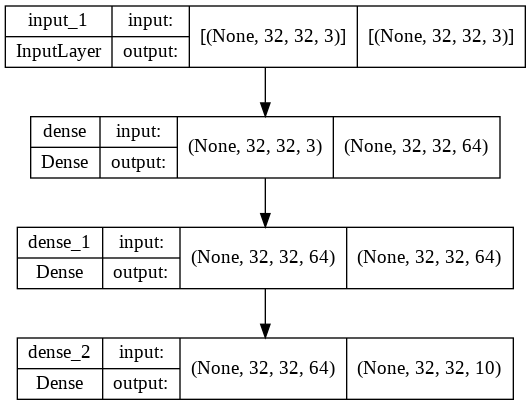

In [ ]:
keras.utils.plot_model (data_model.model, show_shapes = True)